# Simple neural network
Goal : to use the Keras deep learning library to train your first neural network on a custom image dataset.

Most Keras tutorials use the basics of the library using an image classification dataset such as MNIST (handwriting recognition) or CIFAR-10 (basic object recognition). This notebook uses your own custom images.

The process of how to train a simple non-convolutional network on your own custom dataset:
1. Importing (or installing) Keras and other packages on your system
2. Loading your data from disk
3. Creating your training and testing splits
4. Defining your Keras model architecture
5. Compiling your Keras model
6. Training your model on your training data
7. Evaluating your model on your test data
8. Making predictions using your trained Keras model

In [2]:
# Import libraries and packages
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

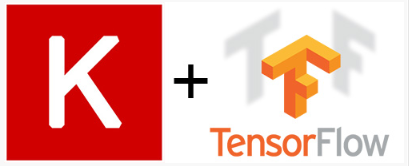

## Load data from disk

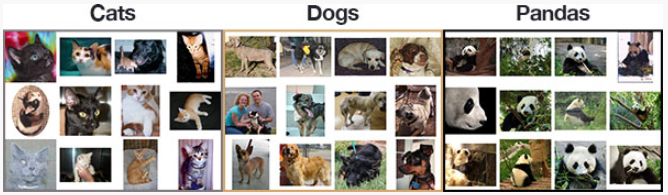

In [3]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('animals')))   # data folder with 3 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
    # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
 
    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...
Time taken: 9.7 seconds
done


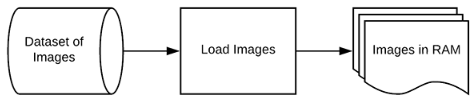

## Split data for training and validation

In [4]:
# partition the data into 80% training and 20% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED)

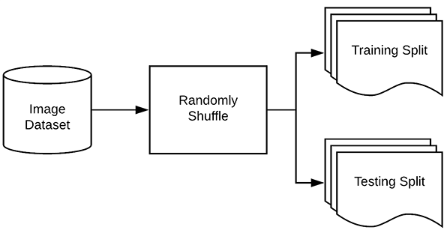

In [5]:
trainX

array([[0.01568627, 0.03137255, 0.01960784, ..., 0.11764706, 0.24313725,
        0.30980392],
       [0.03137255, 0.04313725, 0.04313725, ..., 0.17254902, 0.18823529,
        0.18823529],
       [0.04705882, 0.08235294, 0.07058824, ..., 0.21176471, 0.24705882,
        0.21960784],
       ...,
       [0.38039216, 0.20392157, 0.18823529, ..., 0.46666667, 0.6       ,
        0.55294118],
       [0.01960784, 0.03529412, 0.03921569, ..., 0.59607843, 0.47843137,
        0.67058824],
       [0.19607843, 0.18039216, 0.19215686, ..., 0.6       , 0.62745098,
        0.66666667]])

In [6]:
trainY

array(['Cat', 'Cat', 'Cat', ..., 'Dog', 'Cat', 'Panda'], dtype='<U5')

In [7]:
type(trainY)

numpy.ndarray

In [8]:
# convert the labels from integers/categories to vectors 
# (for 2-class, binary classification you should use Keras' to_categorical function instead)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)   # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = lb.transform(testY)         # transform = perform the one-hot encoding (unique class labels already found)

# This is the categorical vector after transformation
# [1, 0, 0] # corresponds to cat
# [0, 1, 0] # corresponds to dog
# [0, 0, 1] # corresponds to panda

In [9]:
trainY

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

## Define neural network architecture using Keras

In [10]:
# define the 3072-1024-512-3 architecture using Keras

model = Sequential()   # input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))   # first hidden layer has 1024 nodes
model.add(Dense(512, activation="sigmoid"))                         # second hidden layer has 512 nodes
model.add(Dense(len(lb.classes_), activation="softmax"))            # output layer with number of possible class labels

Instructions for updating:
Colocations handled automatically by placer.


## Compile Model

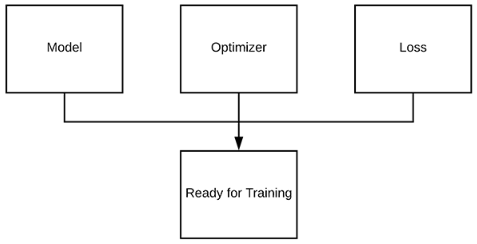

In [11]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 60
 
# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


## Fit (ie, Train) model

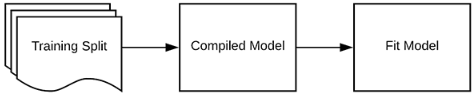

In [12]:
# train the neural network on training data set
# batch_size (32) controls the size of each group of data to pass through the network. 
# Larger GPUs would be able to accommodate larger batch sizes (eg. 64)
time1 = time.time()   # to measure time taken
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Instructions for updating:
Use tf.cast instead.
Train on 2400 samples, validate on 600 samples
Epoch 1/60
2400/2400 [==============================] - 2s 887us/step - loss: 1.1107 - acc: 0.3321 - val_loss: 1.1097 - val_acc: 0.3217
Epoch 2/60
2400/2400 [==============================] - 2s 785us/step - loss: 1.0835 - acc: 0.4021 - val_loss: 1.0638 - val_acc: 0.4983
Epoch 3/60
2400/2400 [==============================] - 2s 775us/step - loss: 1.0639 - acc: 0.4329 - val_loss: 1.0633 - val_acc: 0.3717
Epoch 4/60
2400/2400 [==============================] - 2s 766us/step - loss: 1.0518 - acc: 0.4550 - val_loss: 1.0553 - val_acc: 0.3733
Epoch 5/60
2400/2400 [==============================] - 2s 795us/step - loss: 1.0371 - acc: 0.4562 - val_loss: 1.0184 - val_acc: 0.5067
Epoch 6/60
2400/2400 [==============================] - 2s 767us/step - loss: 1.0237 - acc: 0.4858 - val_loss: 0.9948 - val_acc: 0.5667
Epoch 7/60
2400/2400 [==============================] - 2s 771us/step - loss: 1.0049 - ac

## Evaluate Model

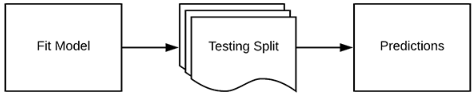

In [13]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

         Cat       0.60      0.47      0.53       189
         Dog       0.51      0.52      0.52       193
       Panda       0.70      0.82      0.76       218

   micro avg       0.61      0.61      0.61       600
   macro avg       0.61      0.61      0.60       600
weighted avg       0.61      0.61      0.61       600



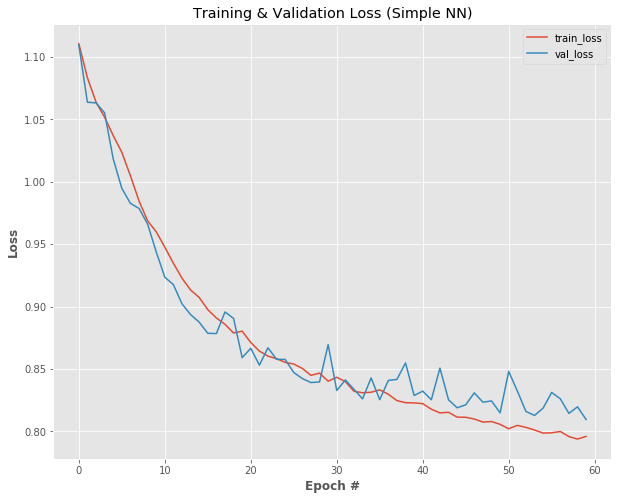

In [14]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

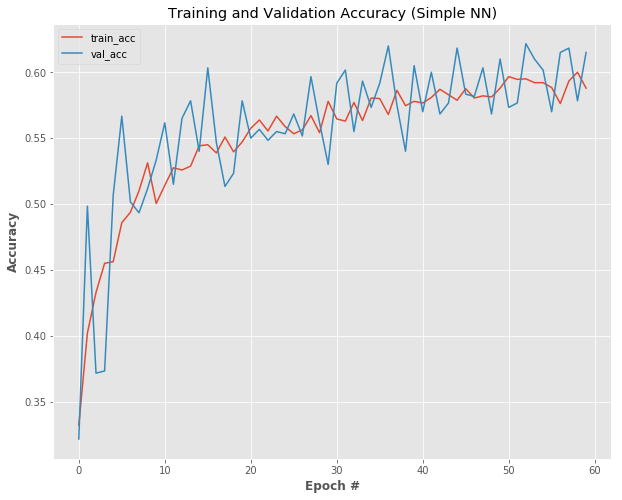

In [15]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training and Validation Accuracy (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [ ]:
# accuracy = 61%

## Save model

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 3,673,091
Trainable params: 3,673,091
Non-trainable params: 0
_________________________________________________________________


In [17]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('simple_NN_model.h5')
f = open('simple_NN_label_bin', "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


## Make predictions on new data using your Keras model

In [23]:
# import the necessary packages
from keras.models import load_model
import pickle
import cv2

# load the input image and resize it to the target spatial dimensions
width = 32
height = 32
image = cv2.imread("images\dog.jpg")
output = image.copy()
image = cv2.resize(image, (width, height))

# scale the pixel values to [0, 1]
image = image.astype("float") / 255.0

# for a simple fully-connected network, flatten the image
image = image.flatten()
image = image.reshape((1, image.shape[0]))

# # load the model and label binarizer
# print("[INFO] loading network and label binarizer...")
# model = load_model('simple_NN_model.h5')
# lb = pickle.loads(open("simple_NN_label_bin", "rb").read())

# make a prediction on the image
preds = model.predict(image)

# find the class label index with the largest corresponding probability
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

# draw the class label + probability on the output image
text = "{}: {:.1f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# show the output image
cv2.imshow("Image", output)
cv2.waitKey(0)   # Delay in milliseconds. 0 is the special value that means “forever”, until you close the image window

-1

In [19]:
preds[0][1]

0.56551534

In [20]:
lb.classes_[1]

'Dog'

Text(0, 0.5, 'Category')

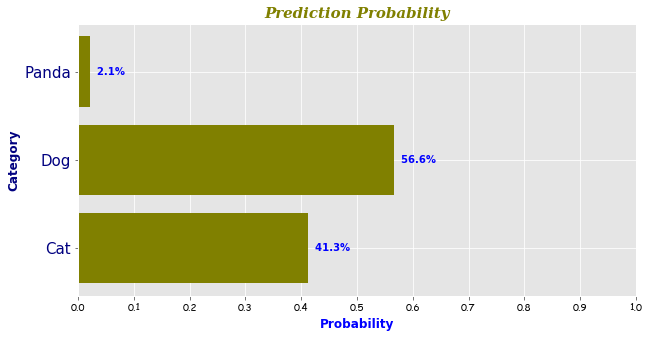

In [21]:
# plot the prediction probability for each category
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
plt.figure(figsize = [10,5])   # [width, height]

x = [ lb.classes_[0], lb.classes_[1], lb.classes_[2] ]
y = [ preds[0][0], preds[0][1], preds[0][2] ]
plt.barh(x, y, color='olive')

ticks_x = np.linspace(0, 1, 11)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15, color='navy' )
for i, v in enumerate(y):
    plt.text(v, i, "  "+str((v*100).round(1))+"%", color='blue', va='center', fontweight='bold')

plt.title('Prediction Probability', family='serif', fontsize=15, style='italic', weight='bold', color='olive', loc='center', rotation=0)
plt.xlabel('Probability', fontsize=12, weight='bold', color='blue')
plt.ylabel('Category', fontsize=12, weight='bold', color='navy')

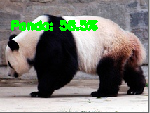

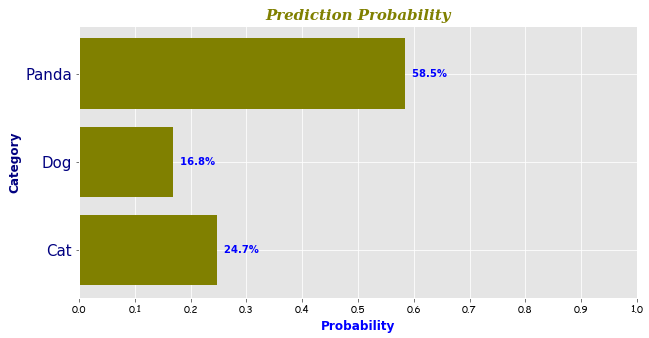

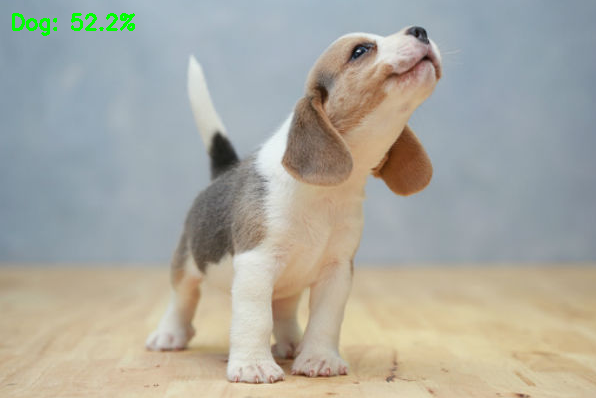

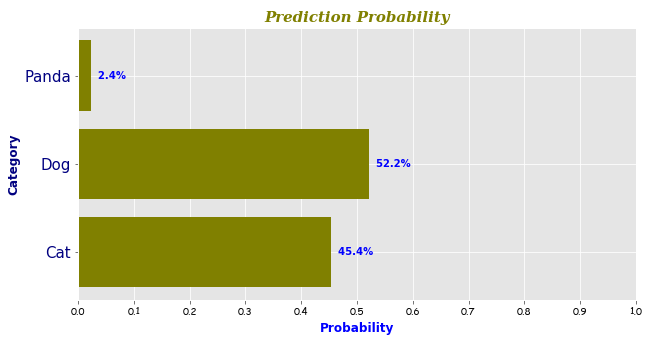

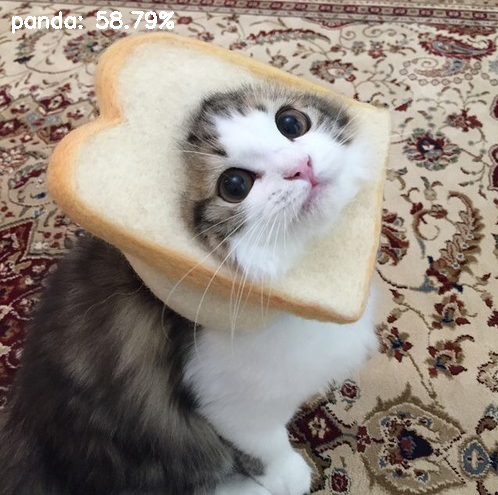
wrong prediction

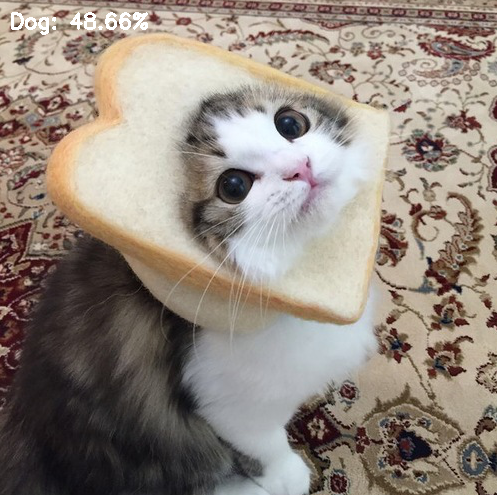
wrong prediction